In [2]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
base_dir = '/Users/sachinmalik/Desktop/chatdataset'
train_dir = os.path.join(base_dir,'testing')
val_dir = os.path.join(base_dir,'validation')

In [4]:
train_chat_dir = os.path.join(train_dir, 'chat')

train_other_dir = os.path.join(train_dir, 'other')

validation_chat_dir = os.path.join(val_dir, 'chat')

validation_other_dir = os.path.join(val_dir, 'other')

print(len(train_chat_dir))


51


In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=180,
      horizontal_flip=True,)
val_datagen = ImageDataGenerator(rescale=1./255)


In [20]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 382 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               5308544   
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

In [22]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=1e-4),metrics=['accuracy'])

In [24]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=20,  
      epochs=10,
      validation_data=validation_generator,
      validation_steps=5)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 20 steps, validate for 5 steps
Epoch 1/10
20/20 [==============================] - 70s 4s/step - loss: 0.0721 - accuracy: 0.9791 - val_loss: 0.6258 - val_accuracy: 0.8265
Epoch 2/10
20/20 [==============================] - 48s 2s/step - loss: 0.0522 - accuracy: 0.9764 - val_loss: 0.5421 - val_accuracy: 0.8673
Epoch 3/10
20/20 [==============================] - 47s 2s/step - loss: 0.0457 - accuracy: 0.9817 - val_loss: 0.5813 - val_accuracy: 0.8571
Epoch 4/10
20/20 [==============================] - 47s 2s/step - loss: 0.0472 - accuracy: 0.9764 - val_loss: 0.6635 - val_accuracy: 0.8469
Epoch 5/10
20/20 [==============================] - 49s 2s/step - loss: 0.0302 - accuracy: 0.9869 - val_loss: 0.9259 - val_accuracy: 0.8673
Epoch 6/10
20/20 [==============================] - 46s 2s/step - loss: 0.0510 - accuracy: 0.9817 - val_loss: 0.4405 - val_accuracy: 0.9184
Epoch 7/10
20/20 [==============================] - 46s 2s/step - los

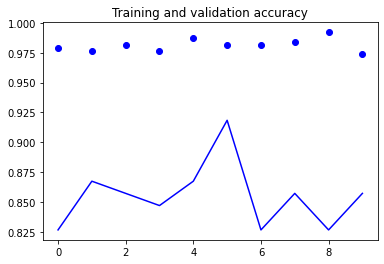

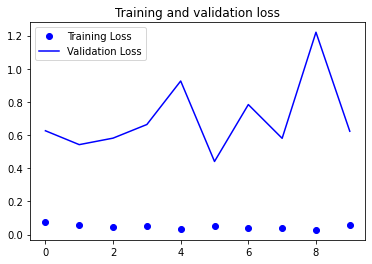

In [27]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [29]:
model.save('saved_model/chat_model') 

INFO:tensorflow:Assets written to: saved_model/chat_model/assets


In [32]:
import pathlib
convertor = tf.lite.TFLiteConverter.from_saved_model('saved_model/chat_model')
tflite_model = convertor.convert()

tf_file = pathlib.Path('saved_model/chat.tflite')
tf_file.write_bytes(tflite_model)


21278048